In [1]:
import os
import numpy as np

import shapely

import clima_anom as ca

import matplotlib.cbook
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import cartopy
import cartopy.feature as cf
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

In [2]:
data = ca.read_netcdf('/mnt/Data/Data/PF/rgpf_SA_count/rgpf_SA_count.nc',2)
lat = data['lat']
lon = data['lon']
tim = data['time']
pf_count = data['count']

nlat = len(lat)
nlon = len(lon)

lon2d, lat2d = np.meshgrid(lon, lat)

lat : (120,)
lon : (110,)
time : (85,)
count : (85, 120, 110)


In [3]:
andes = list(shpreader.Reader('..'+os.sep+'mapping'+os.sep+'andes_1000.shp').geometries())
andes2 = list(shpreader.Reader('/mnt/Data/shape/Andes/height/andes_2000.shp').geometries())
andes3 = list(shpreader.Reader('/mnt/Data/shape/Andes/height/andes_3000.shp').geometries())
andes4 = list(shpreader.Reader('/mnt/Data/shape/Andes/height/andes_4000.shp').geometries())

In [4]:
salida = None
test = []

for t in range(len(tim)):

    if tim[t].month == 12 or tim[t].month == 1 or tim[t].month == 2:

        test.append(pf_count[t,:,:])

salida = np.array(test)
print(salida.shape)

(21, 120, 110)


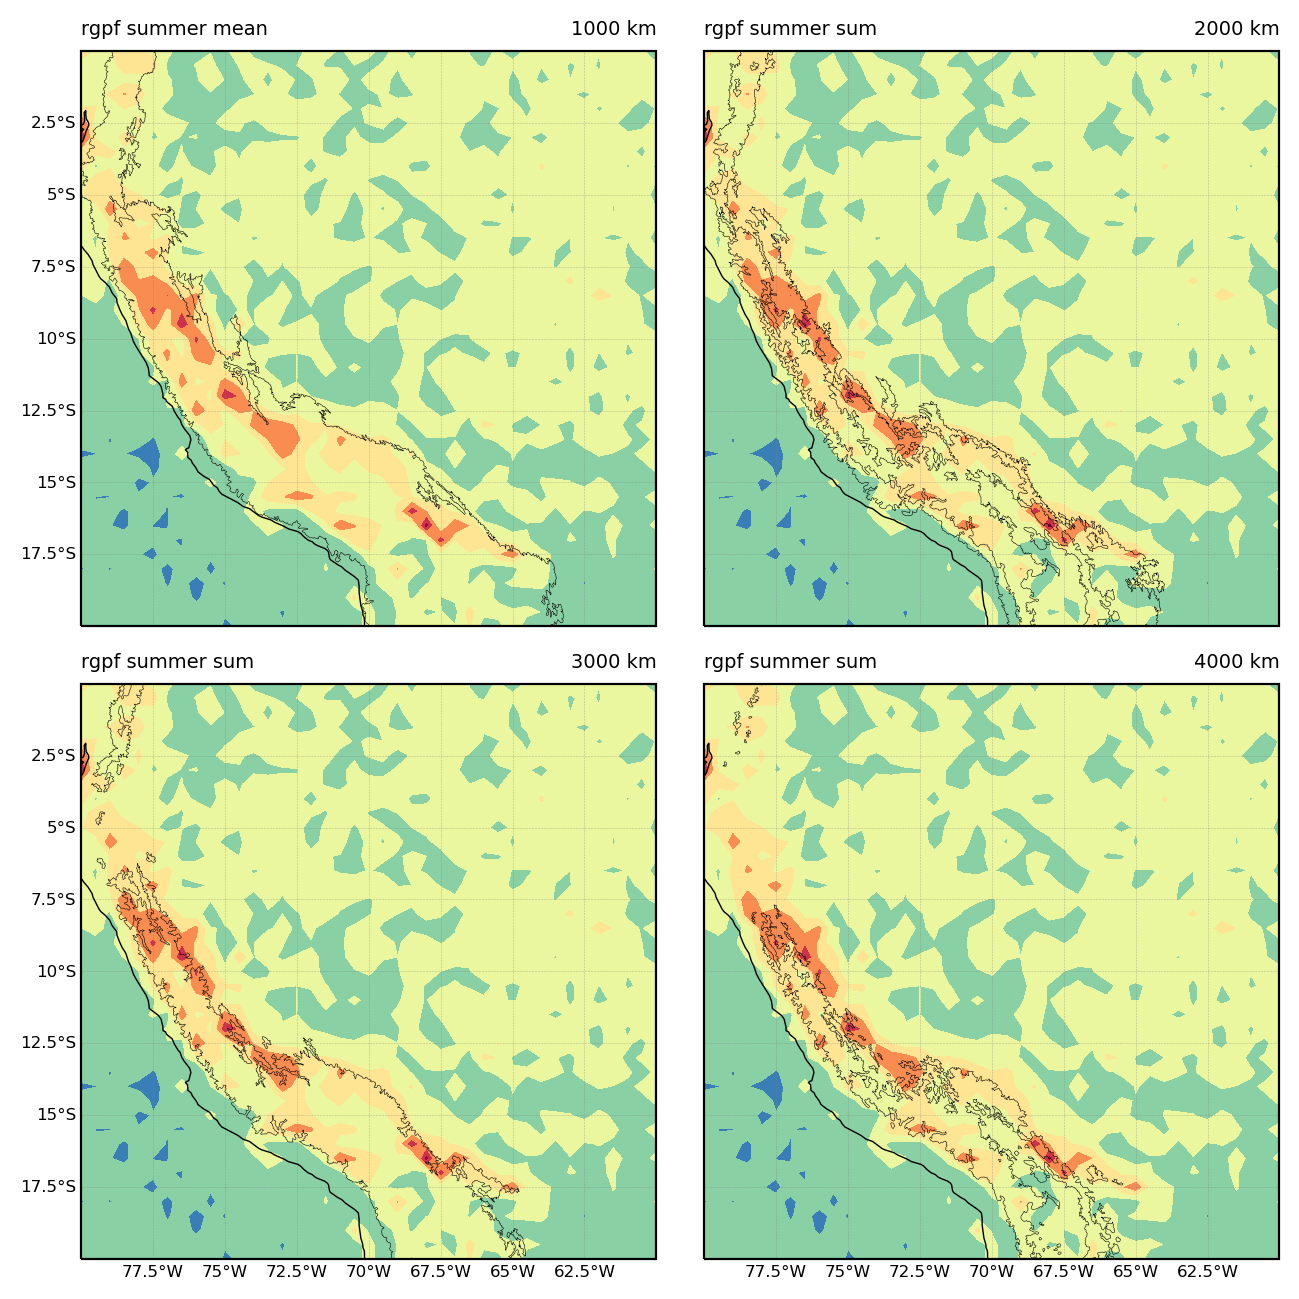

In [5]:
cmap = plt.cm.Spectral_r

levels = None

proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(8,8),dpi=200)
gs = gridspec.GridSpec(2,2)

#=====================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
ax1.add_geometries(andes,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=0.2,zorder=5)
ax1.set_extent([-80,-60,-20,0],crs=proj)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}

a1 = ax1.contourf(lon2d, lat2d, np.mean(salida,axis=0), cmap=cmap, levels=levels, extend='max')

ax1.set_title('rgpf summer mean',loc='left',fontsize=7)
ax1.set_title('1000 km',loc='right',fontsize=7)

#=====================================================================================================
ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
# ax1.add_geometries(andes,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=0.2,zorder=5)
ax1.add_geometries(andes2,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=0.2,zorder=5)
ax1.set_extent([-80,-60,-20,0],crs=proj)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.left_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}

a1 = ax1.contourf(lon2d, lat2d, np.mean(salida,axis=0), cmap=cmap, levels=levels, extend='max')

ax1.set_title('rgpf summer sum',loc='left',fontsize=7)
ax1.set_title('2000 km',loc='right',fontsize=7)

#=====================================================================================================
ax1 = plt.subplot(gs[1, 0], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
# ax1.add_geometries(andes,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=0.2,zorder=5)
ax1.add_geometries(andes3,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=0.2,zorder=5)
ax1.set_extent([-80,-60,-20,0],crs=proj)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}

a1 = ax1.contourf(lon2d, lat2d, np.mean(salida,axis=0), cmap=cmap, levels=levels, extend='max')

ax1.set_title('rgpf summer sum',loc='left',fontsize=7)
ax1.set_title('3000 km',loc='right',fontsize=7)

#=====================================================================================================
ax1 = plt.subplot(gs[1, 1], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
# ax1.add_geometries(andes,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=0.2,zorder=5)
ax1.add_geometries(andes4,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=0.2,zorder=5)
ax1.set_extent([-80,-60,-20,0],crs=proj)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}

a1 = ax1.contourf(lon2d, lat2d, np.mean(salida,axis=0), cmap=cmap, levels=levels, extend='max')

ax1.set_title('rgpf summer sum',loc='left',fontsize=7)
ax1.set_title('4000 km',loc='right',fontsize=7)

#=====================================================================================================
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, hspace=0.1, wspace=0.01)